In [1]:
## H1 f(x) = A*sin(kx) + Gauss 데이터 생성 fitting - parameter A, k 찾기
## H2 A,k찾기 X^2 값의 histogram 그리기

In [2]:
import math
import matplotlib.pyplot as plt
import random

In [3]:
def f(x,A,k):
  return A*math.sin(k*x)

In [16]:
real_A=2
real_k=3
data_number=100
x = sorted([random.uniform(-1,1) for i in range(data_number)])
y = [real_A*math.sin(real_k*i)+random.gauss(0,0.5) for i in x]

A,k=0.1,0.1
trials=2000
w=0.001
for i in range(trials):
  MSE=0
  A_error,k_error=0,0
  for j in range(data_number):
    MSE+=(y[j] - f(x[j],A,k))**2
    A_error+=-2*(y[j]-f(x[j],A,k))*math.sin(k*x[j])
    k_error+=-2*(y[j]-f(x[j],A,k))*A*x[j]*math.cos(k*x[j])
  A-=w*A_error
  k-=w*k_error

(25.183078386580156, 1.9323068815998168, 3.0439571673576724)

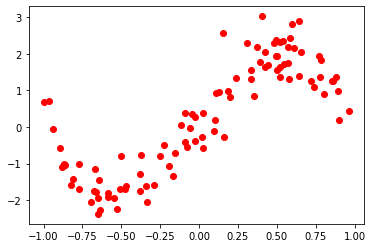

In [26]:
plt.plot(x,y,'ro')
MSE,A,k

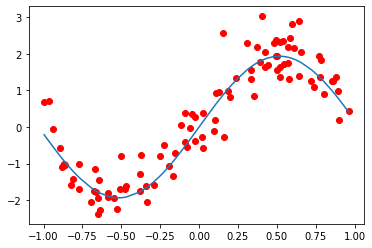

In [27]:
y1=[f(x[i],A,k) for i in range(data_number)]
plt.plot(x,y,'ro')
plt.plot(x,y1)

In [19]:
kai=0
for i in range(data_number):
  kai+=(y[i]-f(x[i],A,k))**2/0.5**2
kai/data_number

1.1737636517518002

In [24]:
# Homework 2
N=100
Histogram=[]

for k in range(N):
  A,k=0.1,0.1
  x = sorted([random.uniform(-1,1) for i in range(data_number)])
  y = [real_A*math.sin(real_k*i)+random.gauss(0,0.5) for i in x]

  for i in range(trials):
    MSE=0
    A_error,k_error=0,0
    
    for j in range(data_number):
      MSE+=(y[j] - f(x[j],A,k))**2
      A_error+=-2*(y[j]-f(x[j],A,k))*math.sin(k*x[j])
      k_error+=-2*(y[j]-f(x[j],A,k))*A*x[j]*math.cos(k*x[j])
    A-=w*A_error
    k-=w*k_error

  kai=0
  for i in range(data_number):
    kai+=((y[i]-f(x[i],A,k))**2/0.5)**2
  Histogram.append(kai/data_number)

(array([ 6., 19., 21., 18., 14.,  6.,  6.,  6.,  2.,  2.]),
 array([0.35053251, 0.4625317 , 0.57453089, 0.68653007, 0.79852926,
        0.91052845, 1.02252764, 1.13452682, 1.24652601, 1.3585252 ,
        1.47052439]),
 <a list of 10 Patch objects>)

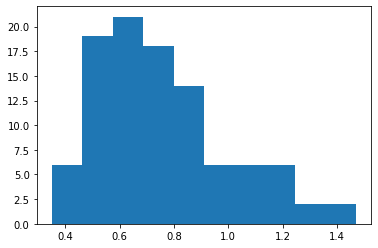

In [25]:
plt.hist(Histogram)